In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from tensorflow import keras

I will take dataset from keras 

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

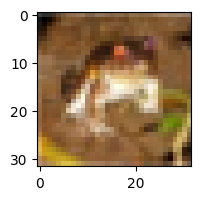

In [8]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[0])

this is a frog

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_train=y_train.reshape(-1,)

In [13]:
y_train.shape

(50000,)

In [14]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [15]:
y_test=y_test.reshape(-1,)

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [17]:
classes={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [18]:
classes[y_train[0]]

'frog'

Normalizing xtrain,xtest since for rgb channel max value is 255 so i will divide it by 255

In [19]:
X_trainscaled=X_train/255
X_testscaled=X_test/255

In [20]:
#X_trainscaled

NOW I BUILD A ANN first then on second try i will do CNN

In [21]:
model=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(X_trainscaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8859 - accuracy: 0.3327
Epoch 2/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6853 - accuracy: 0.3975
Epoch 3/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.6173 - accuracy: 0.4250
Epoch 4/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5719 - accuracy: 0.4433
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5397 - accuracy: 0.4541


In [22]:
model.evaluate(X_testscaled,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.5270 - accuracy: 0.4554


[1.5270037651062012, 0.4553999900817871]

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_testscaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.51      0.51      1000
           1       0.62      0.46      0.53      1000
           2       0.40      0.22      0.28      1000
           3       0.35      0.30      0.32      1000
           4       0.43      0.29      0.35      1000
           5       0.36      0.34      0.35      1000
           6       0.42      0.61      0.50      1000
           7       0.48      0.56      0.52      1000
           8       0.48      0.69      0.57      1000
           9       0.48      0.57      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.45      0.46      0.45     10000
weighted avg       0.45      0.46      0.45     10000



we can clearly see accuracy and f1 scores are really low with ann

NOW USING CNN MODEL

In [24]:
model2=keras.Sequential([
    #we do activation for conv2d to make it linear
    keras.layers.Conv2D(filters=50, kernel_size=(3, 3),padding="same",activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),#kernal size max pooling will take single value max of 2x2 kernal
    
    keras.layers.Conv2D(filters=30, kernel_size=(3, 3),padding="same",activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
])

In [25]:
model2.compile(optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"]
)

In [26]:
model2.fit(X_trainscaled,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.3517 - accuracy: 0.5154
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9794 - accuracy: 0.6523
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7846 - accuracy: 0.7238
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6116 - accuracy: 0.7869
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.4524 - accuracy: 0.8447
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.3058 - accuracy: 0.8947
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.1985 - accuracy: 0.9341
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.1393 - accuracy: 0.9535
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.1138 - accuracy: 0.9608
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [27]:
model2.evaluate(X_testscaled,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.7795 - accuracy: 0.6923


[1.7794709205627441, 0.692300021648407]

we can see we get a good accuracy now from 44 in ANN to 70 in CNN

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model2.predict(X_testscaled)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.77      0.71      1000
           1       0.72      0.87      0.79      1000
           2       0.62      0.57      0.60      1000
           3       0.47      0.52      0.49      1000
           4       0.65      0.64      0.64      1000
           5       0.66      0.52      0.58      1000
           6       0.72      0.79      0.75      1000
           7       0.79      0.72      0.76      1000
           8       0.83      0.79      0.81      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [29]:
y_pred=model2.predict(X_testscaled)

313/313 [==============================] - 3s 11ms/step


In [30]:
y_pred

array([[1.5054658e-02, 1.4391403e-02, 1.2678166e-05, ..., 5.1467860e-04,
        1.4510128e-03, 6.7859457e-04],
       [9.9940836e-01, 9.9999988e-01, 1.7811178e-04, ..., 2.3480886e-11,
        9.9996310e-01, 7.6658078e-02],
       [9.9965930e-01, 3.7678955e-03, 8.5695165e-06, ..., 9.7810866e-05,
        9.9981695e-01, 1.6102919e-01],
       ...,
       [1.0352614e-04, 2.9628756e-12, 9.9942458e-01, ..., 5.4572639e-04,
        1.4755509e-13, 2.5370082e-07],
       [1.5240612e-02, 9.9997526e-01, 2.6705671e-02, ..., 3.1038565e-03,
        9.2201503e-08, 1.0452132e-02],
       [3.8380773e-07, 3.8956256e-05, 3.5663139e-02, ..., 1.0000000e+00,
        1.6536993e-07, 1.0596006e-05]], dtype=float32)

In [31]:
np.argmax(y_pred[0])

3

In [32]:
y_classes = [np.argmax(element) for element in y_pred]

In [33]:
y_classes[:10]

[3, 1, 8, 8, 6, 6, 1, 6, 3, 1]

In [34]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

almost same prediction only 3 wrong in first 10

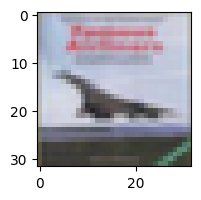

In [35]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[3])

In [36]:
classes[y_classes[3]]

'ship'